# Healthcare 

![Health Care.png](<attachment:Health Care.png>)
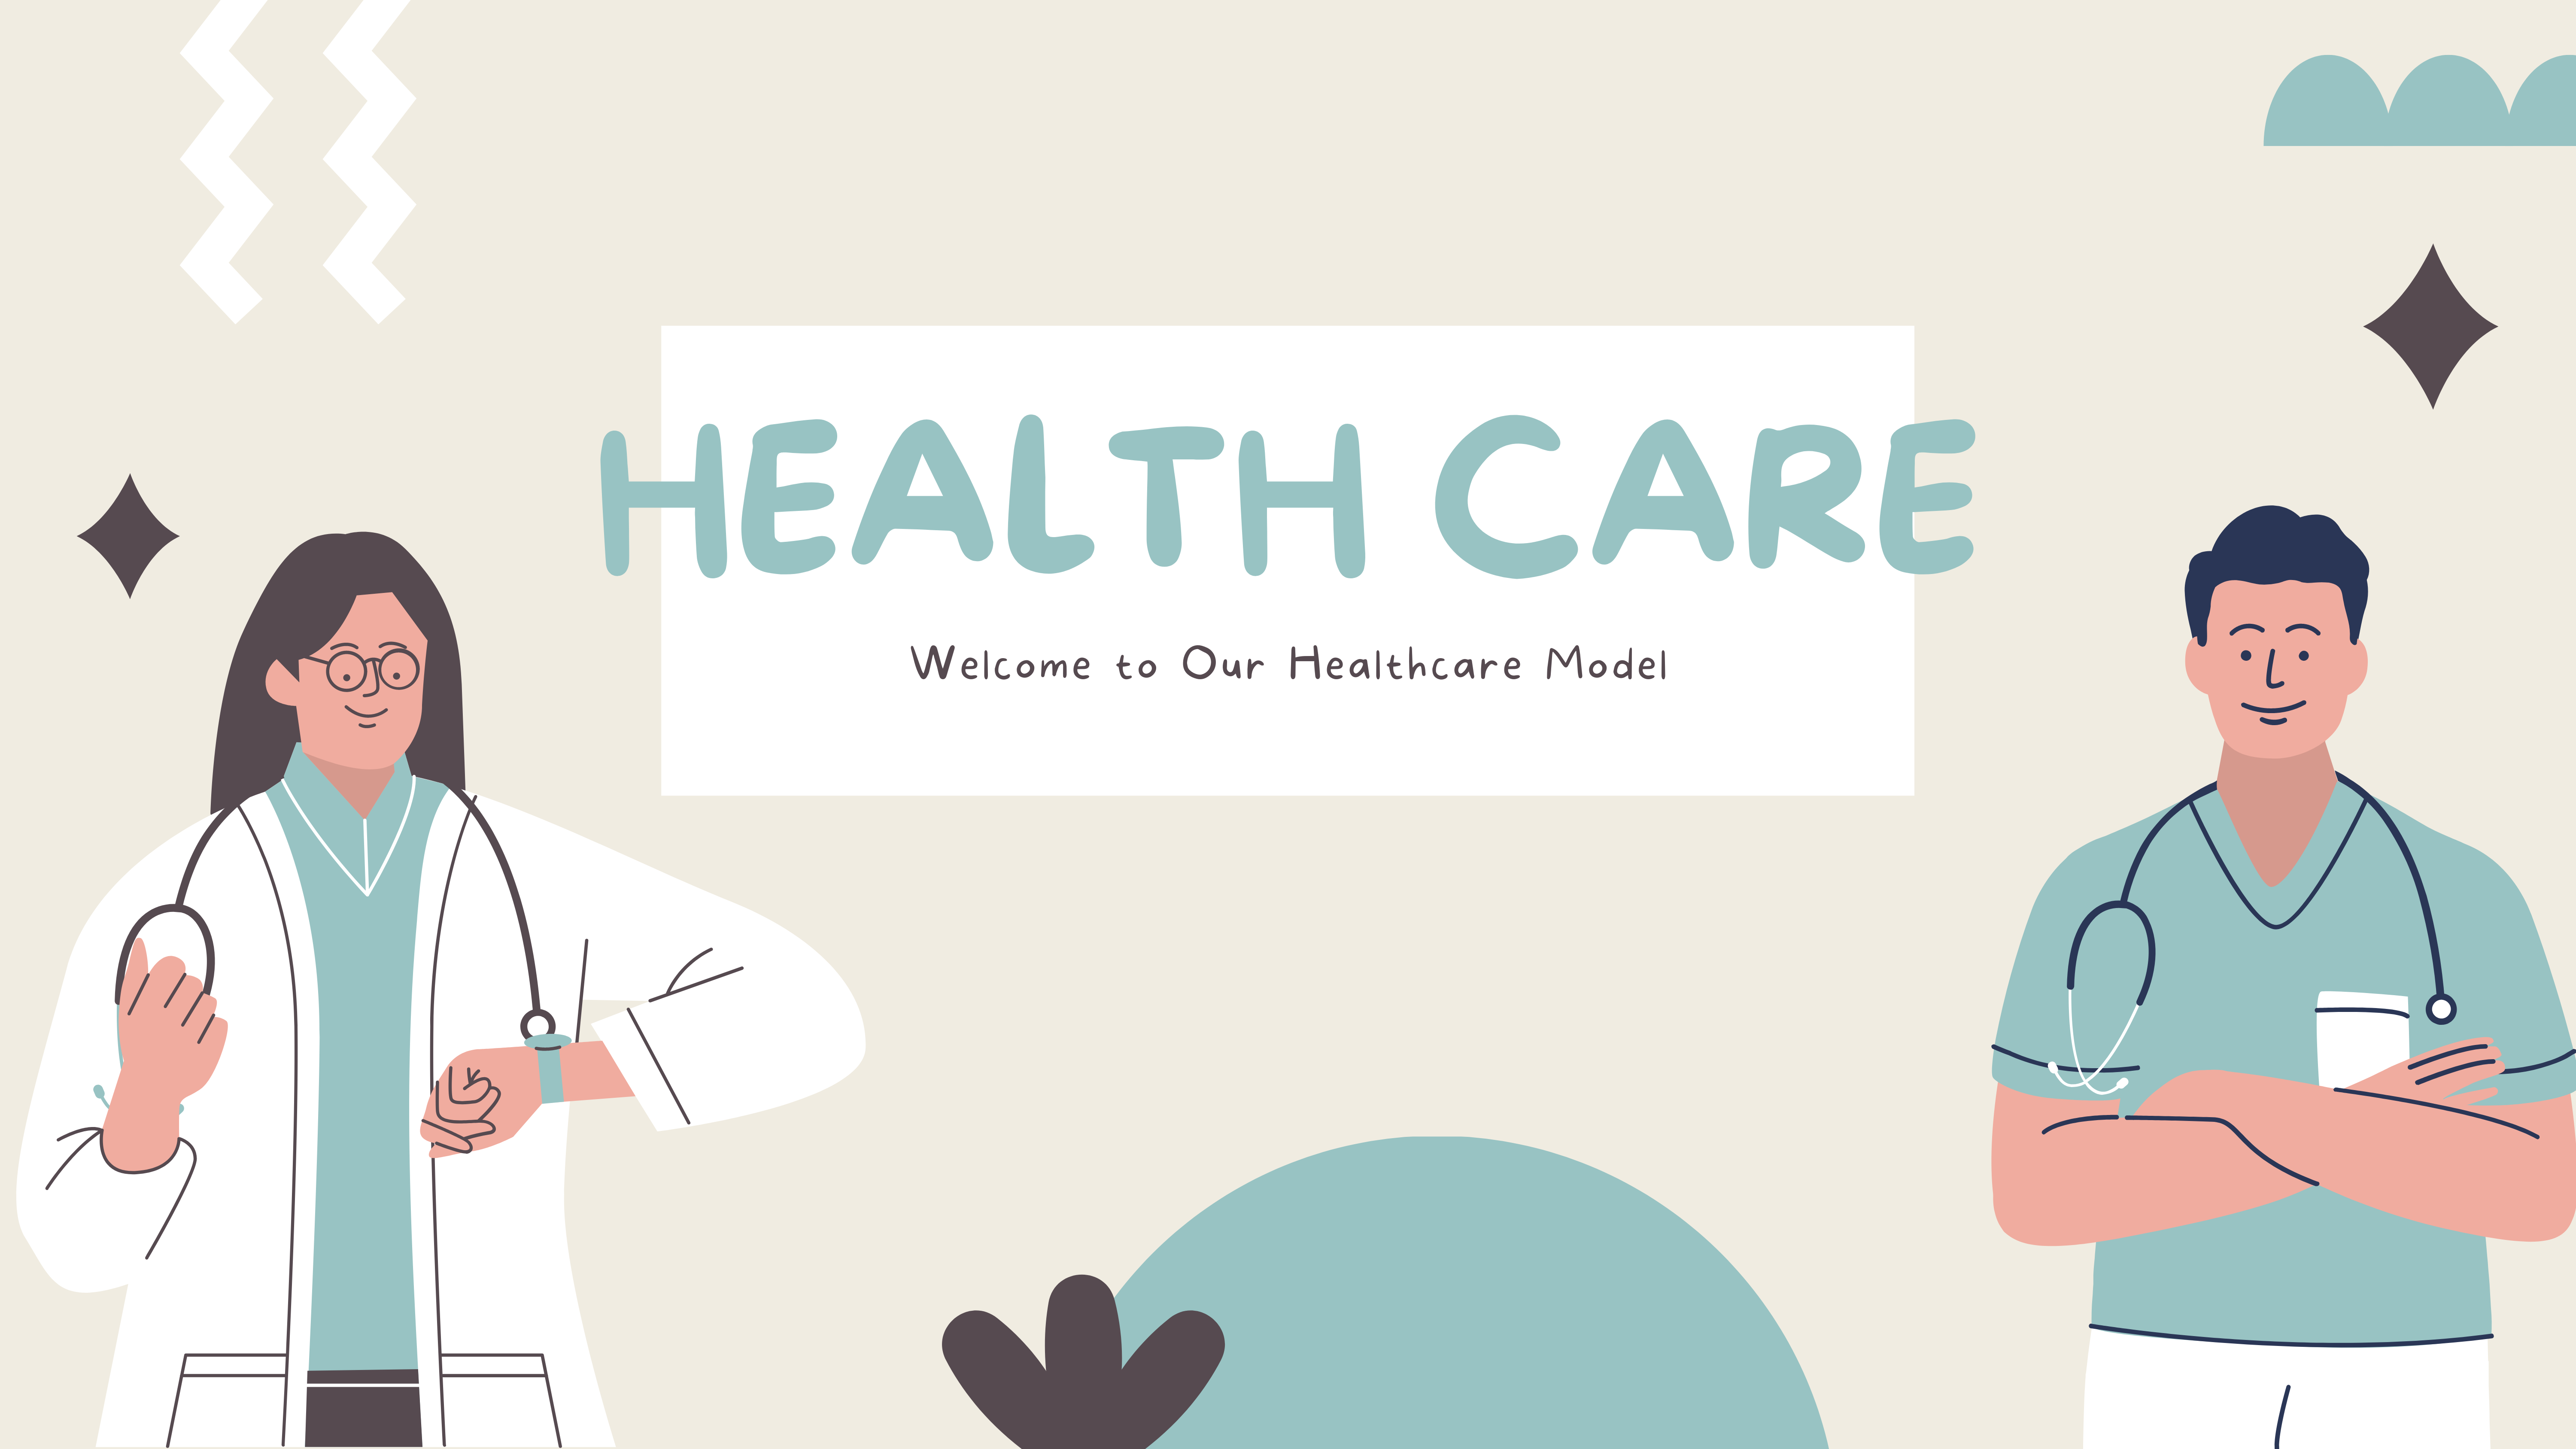

## 📖 Background


## 💾 The Data
| Column     | Description              |
|------------|--------------------------|
| `Name` | Name	This column represents the name of the patient associated with the healthcare record.|
| `Age` | The age of the patient at the time of admission is expressed in years.|
| `Gender` | Indicates the gender of the patient, either "Male" or "Female."|
| `Blood Type` | The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).|
| `Medical Condition` | This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.|
| `Date of Admission` | The date on which the patient was admitted to the healthcare facility.|
| `Doctor` | The name of the doctor responsible for the patient's care during their admission.|
| `Hospital` | Identifies the healthcare facility or hospital where the patient was admitted|
| `Insurance Provider` | This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."|
| `Billing Amount` | The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.The minimum value is 1000 and the maximum is 50000.| 
| `Room Number` | The room number where the patient was accommodated during their admission|
| `Admission Type` | Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.| 
| `Discharge Date` | The date on which the patient was discharged from the healthcare facility, is based on the admission date and a random number of days within a realistic range.| 
| `Medication` | Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."|
| `Test Results (Target column)` | Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," or "Abnormal," indicating the outcome of the test.|


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import seaborn as sns
import mplcyberpunk
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm
plt.style.use("cyberpunk")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import pandas as pd

In [2]:
df_train = pd.read_excel("student_helthcare_dataset_train.xlsx")
df_test= pd.read_excel("student_helthcare_dataset_test.xlsx")
df_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

In [4]:
display(df_train.describe(include="number").round(2))
print("#########################################")
display(df_train.describe(include="object"))

,Age,Billing Amount,Room Number
count,6050.00,6050.00,6050.00
mean,51.43,21587.14,300.27
std,19.55,294099.35,118.03
min,18.00,-22822979.21,-492.00
25%,35.00,13172.40,198.00
50%,52.00,25073.42,300.50
75%,68.00,37712.03,402.00
max,85.00,142610.70,500.00


#########################################


,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,6050,6050,6050,6041,6050,6050,6050,6050,6050,6050,6042,6050
unique,5798,2,8,6,1756,5825,5425,5,3,1768,5,2
top,Joseph Smith,Female,A-,Cancer,2023-03-27,James Williams,Smith and Sons,Cigna,Urgent,2019-09-14,Penicillin,Abnormal
freq,4,3049,776,1048,11,4,12,1266,2065,11,1258,3099


In [5]:
df_train['Room Number']= np.abs(df_train['Room Number'])
df_train['Billing Amount']= np.abs(df_train['Billing Amount'])
billing_outliers= df_train[(df_train['Billing Amount']>50000) | (df_train["Billing Amount"]<1000)]
display(billing_outliers.head(9).round(2))
print("###################################################")
display(len(billing_outliers)) 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.00,292,Emergency,2019-02-08,Lipitor,Normal
12,Steven Bennett,79,Male,O-,Asthma,2022-12-12,Michael Chang,Schultz-Powers,Blue Cross,142610.70,364,Urgent,2022-12-26,Penicillin,Abnormal
15,Beverly Miller,54,Male,A-,NaN,2022-08-05,Jodi Holland,Vaughn PLC,Cigna,141319.50,293,Urgent,2022-09-03,Paracetamol,Normal
27,Mariah Williams,72,Male,A-,Diabetes,2021-03-19,John Harvey,Anderson-Mason,Blue Cross,0.00,219,Elective,2021-03-20,Penicillin,Normal
60,Jesse Williams,73,Male,B-,Arthritis,2019-10-21,Eric Sellers,Burke-Reed,Cigna,0.00,347,Urgent,2019-10-22,Lipitor,Abnormal
87,Albert Carter,29,Female,A-,Diabetes,2020-08-07,Kelly Sanchez,Summers PLC,Cigna,0.00,445,Emergency,2020-08-28,Lipitor,Normal
184,Jillian Robinson,62,Male,A+,Hypertension,2022-05-23,Jordan Johnston,Clark-Shaw,Cigna,22822979.21,216,Emergency,2022-06-11,Penicillin,Abnormal
222,Jacqueline Sanchez,32,Female,AB-,Arthritis,2023-02-22,Katie Erickson,Carey PLC,Medicare,0.00,207,Urgent,2023-03-18,NaN,Normal
592,Robert Benitez PhD,45,Female,AB-,Asthma,2023-09-09,Karen Baker,Reed-Parker,Blue Cross,0.00,495,Emergency,2023-10-01,Aspirin,Normal


###################################################


9

In [6]:
display(df_train.loc[df_train['Billing Amount']==0])


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.0,292,Emergency,2019-02-08,Lipitor,Normal
27,Mariah Williams,72,Male,A-,Diabetes,2021-03-19,John Harvey,Anderson-Mason,Blue Cross,0.0,219,Elective,2021-03-20,Penicillin,Normal
60,Jesse Williams,73,Male,B-,Arthritis,2019-10-21,Eric Sellers,Burke-Reed,Cigna,0.0,347,Urgent,2019-10-22,Lipitor,Abnormal
87,Albert Carter,29,Female,A-,Diabetes,2020-08-07,Kelly Sanchez,Summers PLC,Cigna,0.0,445,Emergency,2020-08-28,Lipitor,Normal
222,Jacqueline Sanchez,32,Female,AB-,Arthritis,2023-02-22,Katie Erickson,Carey PLC,Medicare,0.0,207,Urgent,2023-03-18,NaN,Normal
592,Robert Benitez PhD,45,Female,AB-,Asthma,2023-09-09,Karen Baker,Reed-Parker,Blue Cross,0.0,495,Emergency,2023-10-01,Aspirin,Normal


In [7]:
df_train.loc[billing_outliers.index,'Billing Amount']= (df_train.loc[billing_outliers.index,'Billing Amount'] % 100000).round(2)
df_train.loc[df_train['Billing Amount']==0,'Billing Amount'] = df_train.groupby('Test Results')['Billing Amount'].transform('mean').round(2)


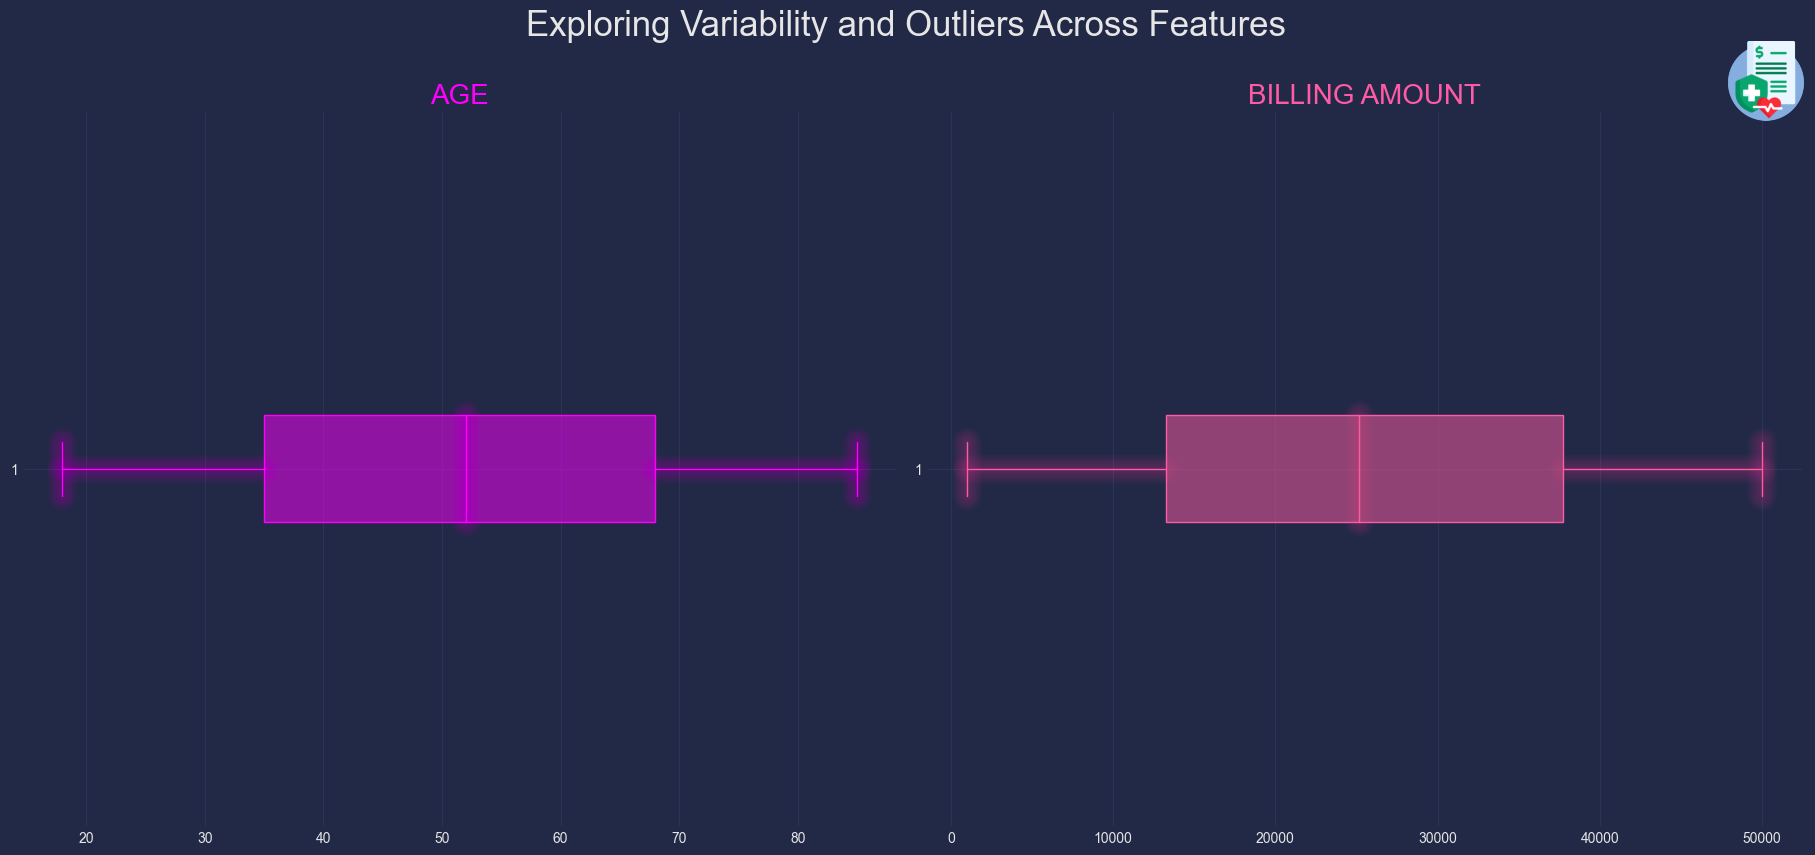

In [8]:
colormap_sect = np.linspace(0, 5, 15)
colors = [cm.spring(x) for x in colormap_sect]
figure, axis = plt.subplots(1, 2, figsize=(18,8), constrained_layout=True)
for column, ax, color in zip(['Age','Billing Amount'], axis.ravel(), colors):
    color_with_alpha = list(color)
    color_with_alpha[3] = 0.5  # Set alpha to 0.5
    bplot = ax.boxplot(df_train[column], vert=False, patch_artist=True, boxprops=dict(facecolor=color_with_alpha, color=color), capprops=dict(color=color),
                        whiskerprops=dict(color=color), flierprops=dict(color=color, markeredgecolor=color), medianprops=dict(color=color))
    ax.set_title(f"\n{column.upper()}", size=20, color=color)
    mplcyberpunk.make_lines_glow(ax, n_glow_lines=20)


figure.suptitle("Exploring Variability and Outliers Across Features", fontsize=25,y=1.05)
img = mpimg.imread('health-insurance.png')

newax = figure.add_axes([0.85, 0.91, 0.15, 0.1], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
plt.show()

In [9]:
display(df_train.loc[df_train['Medical Condition'].isnull()])

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,25233.490000,292,Emergency,2019-02-08,Lipitor,Normal
7,Ryan Hayes,33,Male,A+,NaN,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
15,Beverly Miller,54,Male,A-,NaN,2022-08-05,Jodi Holland,Vaughn PLC,Cigna,41319.500000,293,Urgent,2022-09-03,Paracetamol,Normal
67,Gabrielle Francis,81,Male,A-,NaN,2022-10-15,Jennifer Barry,Gilbert-Moody,Blue Cross,1923.906794,462,Elective,2022-10-19,NaN,Abnormal
121,Wendy Cantu,45,Female,A+,NaN,2023-06-01,Michael Sutton,"Lee, Hunter and Stone",Medicare,14876.215478,162,Emergency,2023-06-13,Lipitor,Abnormal
164,Kyle Dean,39,Male,A-,NaN,2020-02-02,Nicole Fernandez,House-Boyle,Aetna,28792.050621,416,Emergency,2020-02-15,Lipitor,Abnormal
197,Matthew Palmer,63,Female,AB+,NaN,2019-01-27,Nathaniel Wilson,Walker-Mcguire,Cigna,25420.211238,445,Urgent,2019-02-08,Aspirin,Abnormal
201,Melissa Jones,43,Female,AB-,NaN,2019-04-12,Jose Richard,"Cruz, Harris and Murray",Blue Cross,29696.191641,425,Elective,2019-05-08,Ibuprofen,Normal
281,Corey Johnson,55,Male,O+,NaN,2023-09-03,Joe Leonard,Young-Cole,Blue Cross,38734.813542,259,Elective,2023-09-10,Penicillin,Abnormal


In [10]:
col_to_fill = ['Medical Condition','Medication']

mode_values = df_train.groupby('Test Results')[col_to_fill].apply(lambda x : x.mode().iloc[0])

df_train['Medical Condition']= df_train.groupby('Test Results')['Medical Condition'].transform(lambda x:x.fillna(x.mode()[0]))

In [104]:
display(mode_values)

,Medical Condition,Medication
Test Results,,
Abnormal,Asthma,Penicillin
Normal,Cancer,Aspirin


In [12]:
df_train['Medication']= df_train.groupby('Test Results')['Medication'].transform(lambda x:x.fillna(x.mode()[0]))

In [13]:
def parse_time(time):
    try:
        return pd.to_datetime(time, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(time, format='%Y/%m/%d')

In [14]:
df_train['Date of Admission']= df_train['Date of Admission'].apply(parse_time)
df_train['Discharge Date'] = df_train['Discharge Date'].apply(parse_time)

In [15]:
cols_to_convert =['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
df_train[cols_to_convert] = df_train[cols_to_convert].astype('category')

In [16]:
display(df_train[df_train.duplicated()])


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
6000,Allison Jones,34,Male,B+,Obesity,2022-04-01,William Schneider,Fowler Ltd,Blue Cross,41619.30248,266,Emergency,2022-04-08,Penicillin,Normal


In [17]:
df_train.drop_duplicates(inplace=True)

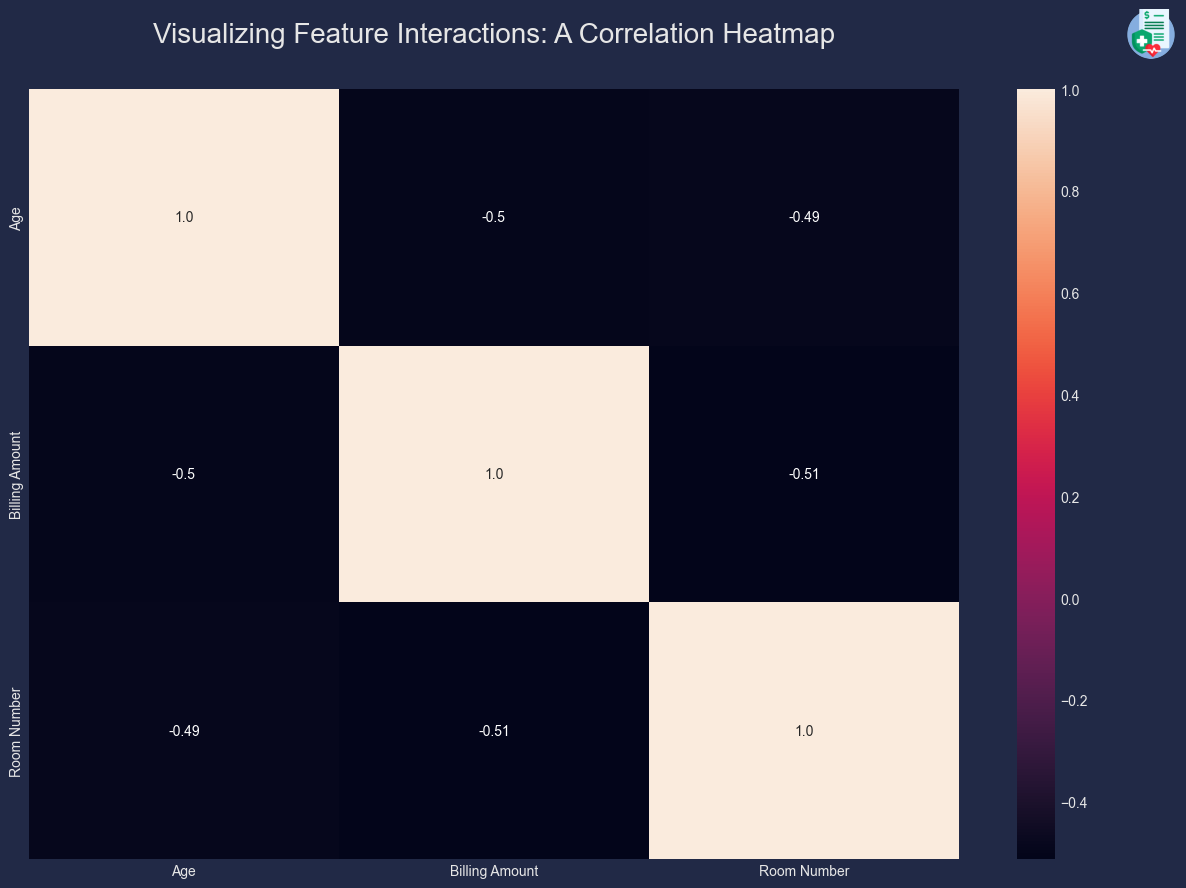

In [18]:
correlation = df_train.corr(numeric_only=True)
fig = plt.figure(figsize=(15, 10))
sns.heatmap(correlation.corr(),annot=True,fmt=".2")
plt.title("Visualizing Feature Interactions: A Correlation Heatmap", fontsize=20,y=1.05)
img = mpimg.imread('health-insurance.png')

newax = fig.add_axes([0.85, 0.91, 0.04, 0.05], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
plt.show()

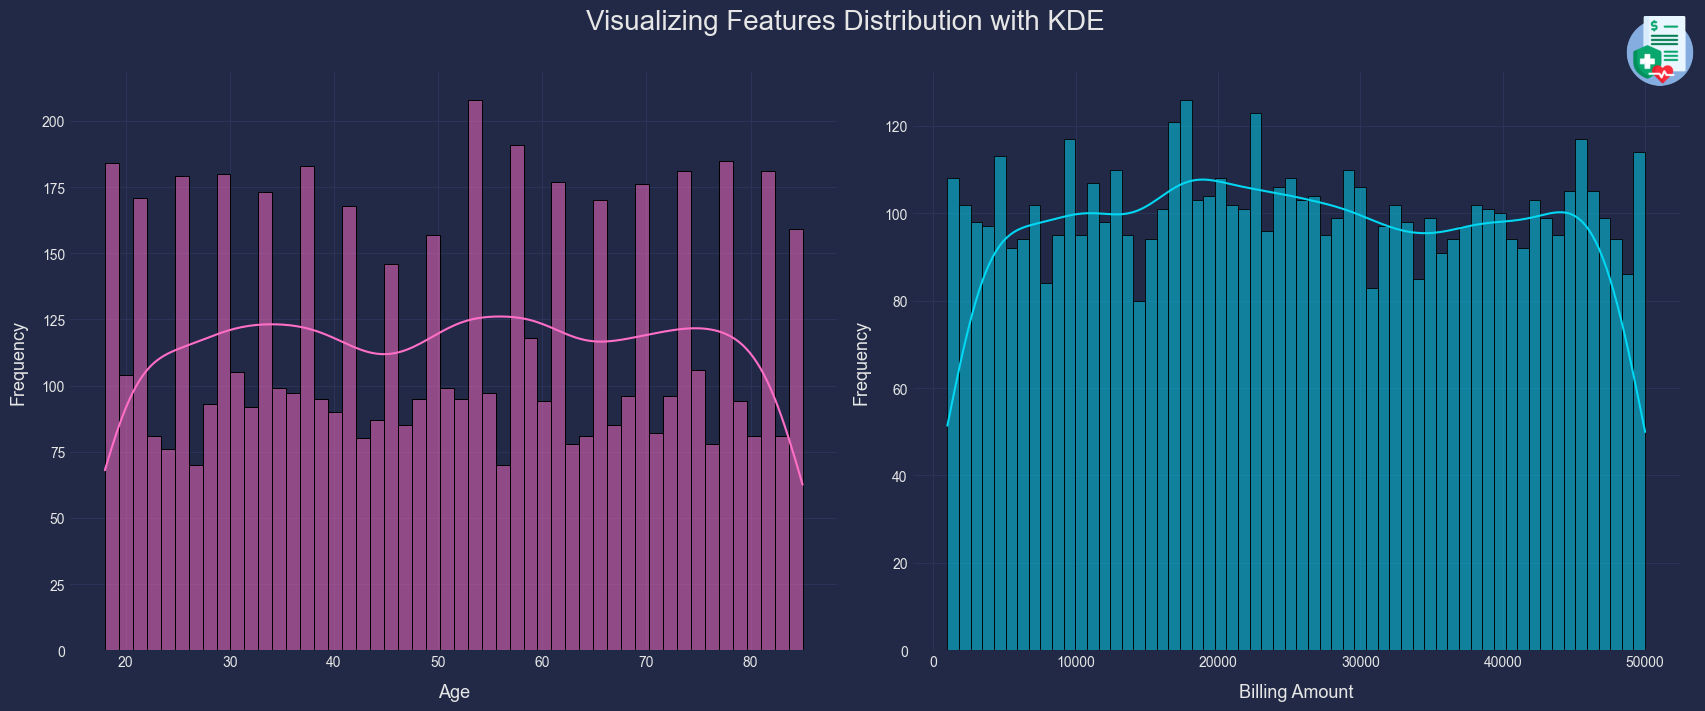

In [19]:


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

sns.histplot(data=df_train, x="Age", kde=True, ax=ax[0], color='#FF6EC7', bins=50)
ax[0].set_xlabel("Age", labelpad =10, fontsize=13)
ax[0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df_train, x="Billing Amount", kde=True, ax=ax[1], color='#02d7f2',bins=60)
ax[1].set_xlabel("Billing Amount", labelpad =10, fontsize=13)
ax[1].set_ylabel("Frequency", labelpad =10, fontsize=13)
fig.suptitle("Visualizing Features Distribution with KDE", fontsize=20,y=1.01)


img = mpimg.imread('health-insurance.png')

newax = fig.add_axes([0.85, 0.9, 0.15, 0.1], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')

sns.despine(left=True, bottom=True)
plt.tight_layout()
for col in ax:
    # add grid lines to each subplot
    col.grid(color='#2A3459')

plt.show()


In [20]:
def plot_donut_chart(df: pd.DataFrame, column: str, ax: plt.Axes, title: str):
    pieData = pd.DataFrame(df[column].value_counts())
    labels = pieData.index.values
    sizes = pieData[column].values
    colormap_sect = np.linspace(0, 5, 25)
    colors = [cm.spring(x) for x in colormap_sect]

    # Set width to 0.5 for both charts
    ax.pie(sizes, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': '#212946', 'width': 0.5})

    # Create a white circle at the center to turn the pie chart into a donut chart
    center_circle = plt.Circle((0, 0), 0.6, color='#212946')
    fig = ax.get_figure()
    fig.gca().add_artist(center_circle)
    
    percents = sizes * 100 / sizes.sum()
    labels = [f'{l}, {p:0.1f}%' for l, p in zip(labels, percents)]
    patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    
    ax.legend(handles=patches, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=20)
    

    ax.set_title(title, fontsize=23)
    ax.set_aspect('equal')  # Set the aspect ratio to be equal

def count_plot(df:pd.DataFrame,x_axes:str,ax:plt.Axes,x_label:str,y_label:str,title:str):
    sns.countplot(data = df, x=x_axes, ax=ax, order= df[x_axes].value_counts().index)
    ax.set_xlabel(x_label,fontsize=18,labelpad=10)
    ax.set_ylabel(y_label, fontsize=18,labelpad=10)
    ax.set_title(title, fontsize=23, y=1.05)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

In [21]:
total_hospitals = len(df_train['Hospital'].unique())
total_docs = len(df_train['Doctor'].unique())
mode_medication = df_train['Medication'].mode()[0]
mode_medical_condition = df_train['Medical Condition'].mode()[0]


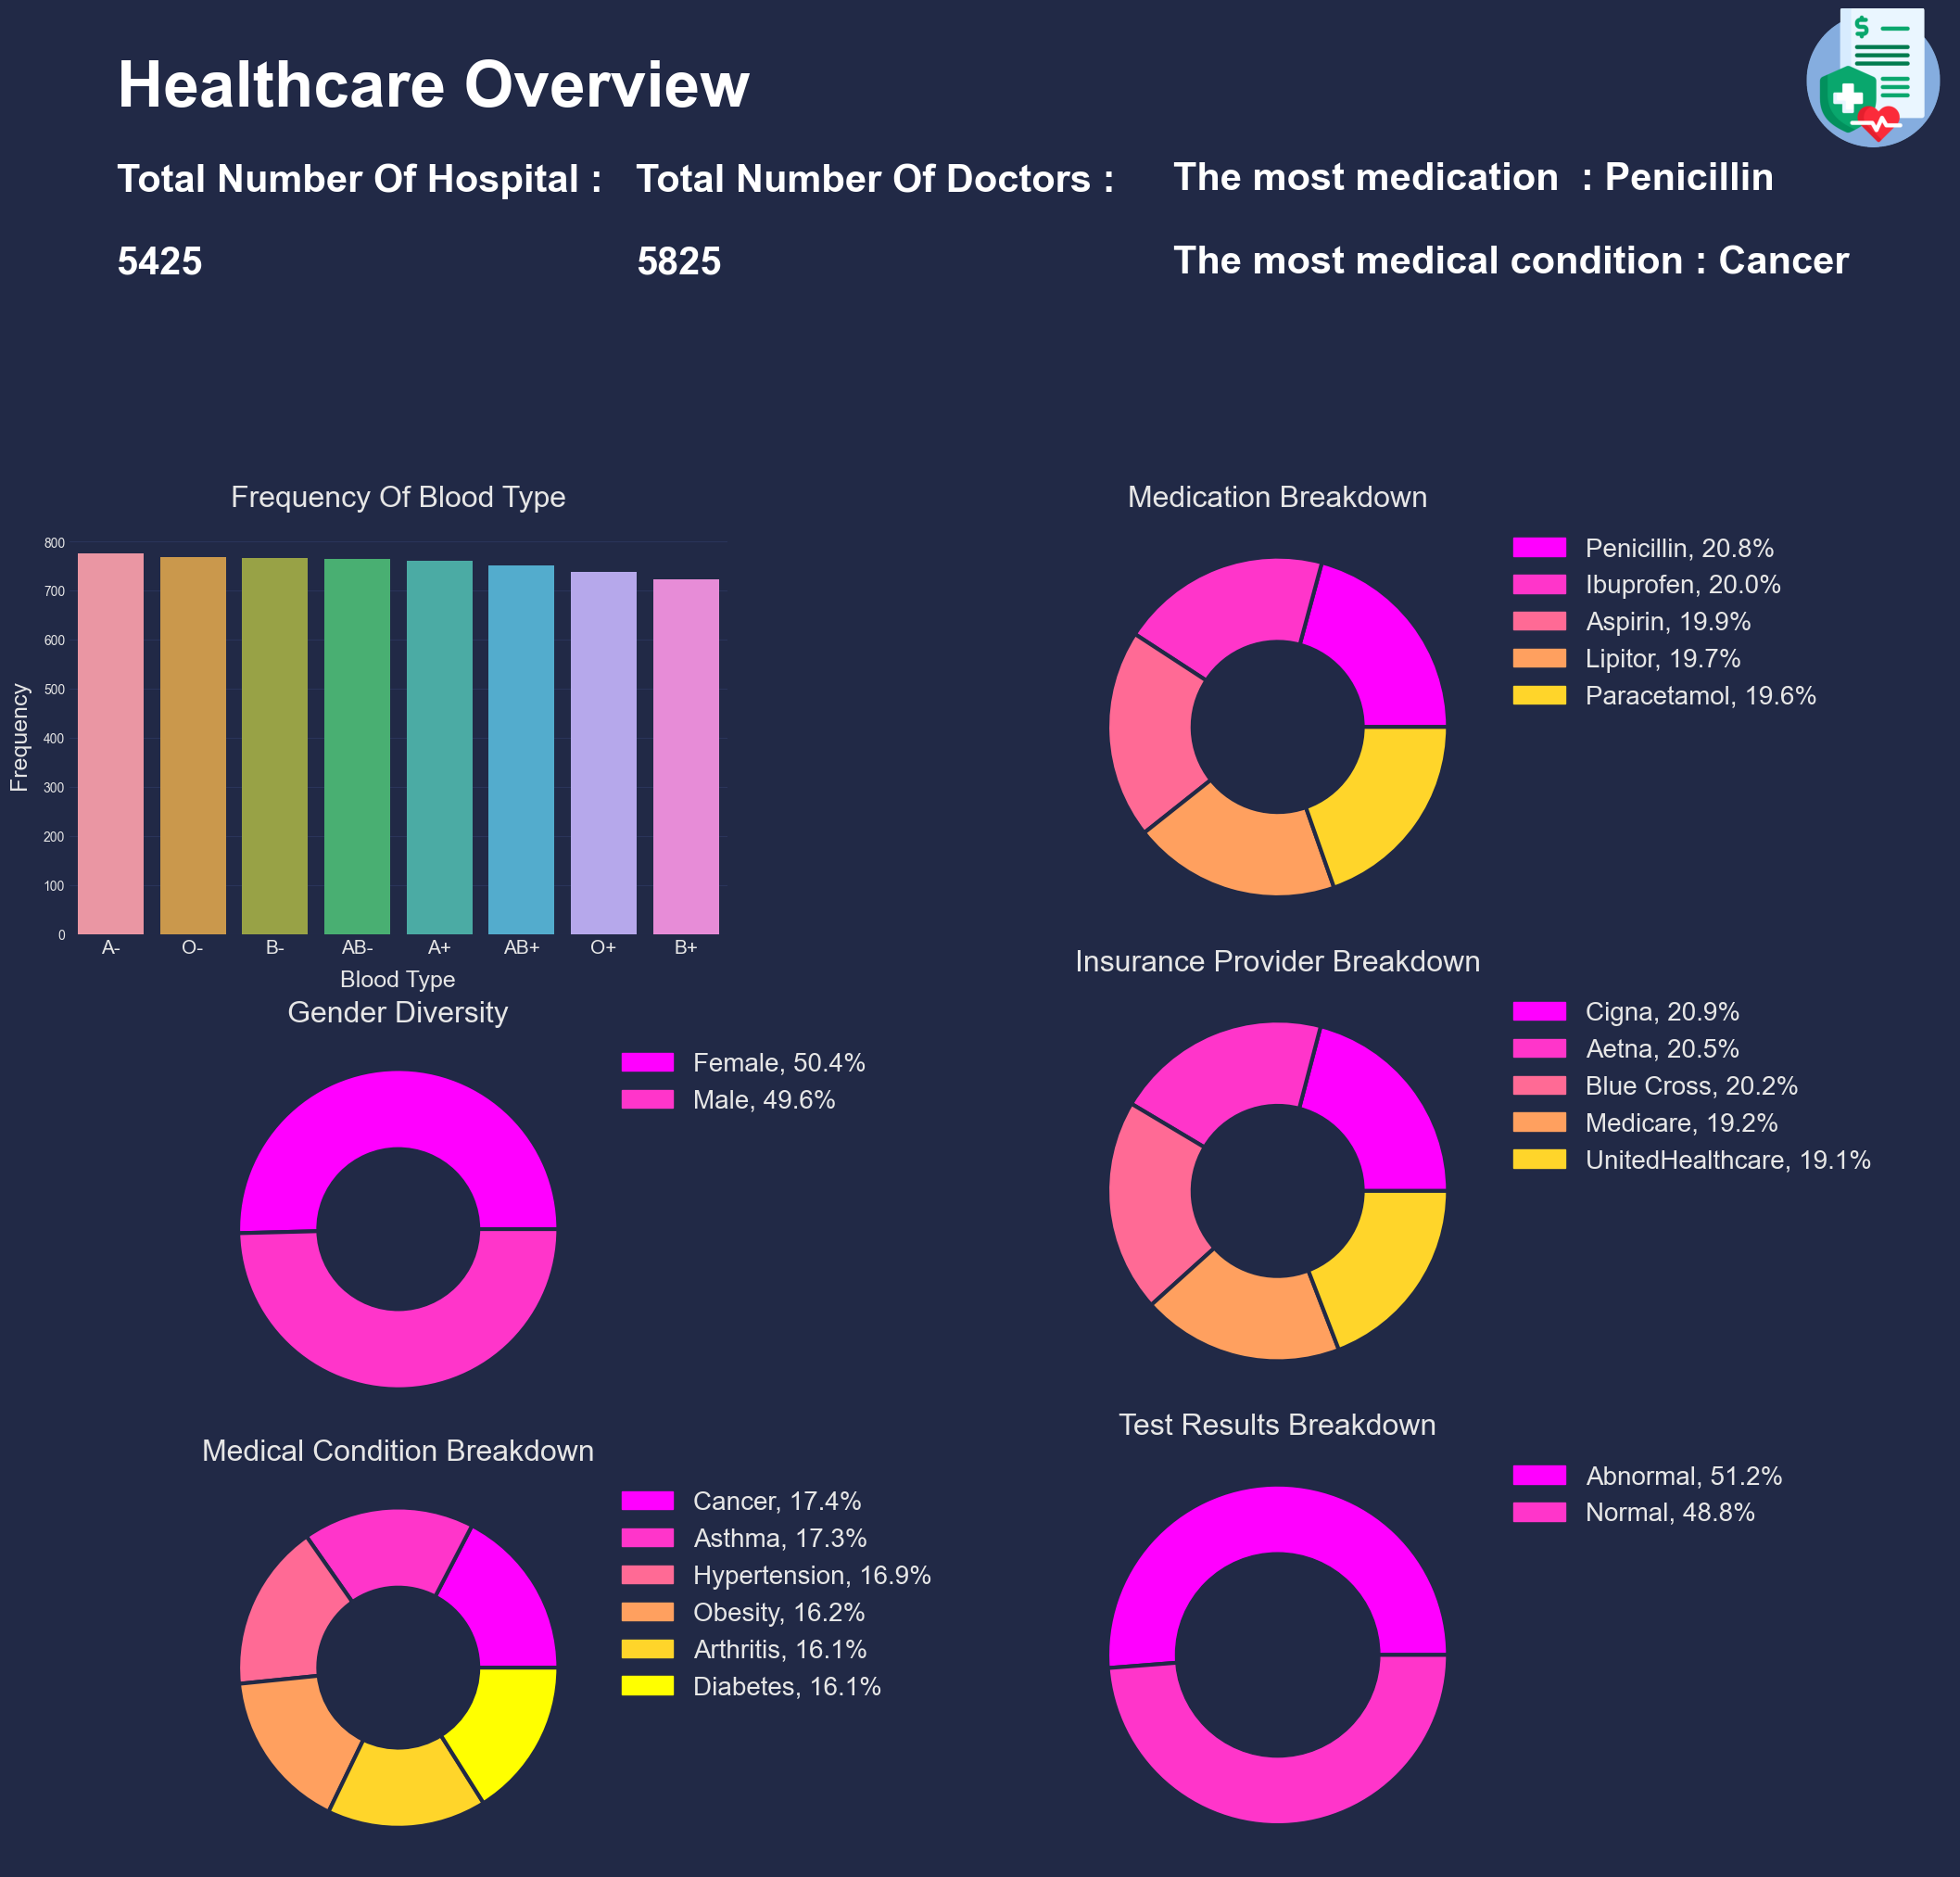

In [22]:
fig = plt.figure(layout="constrained",figsize=(20,15))
fig.set_facecolor("#212946")
subfigs = fig.subfigures(1,2,zorder=-1)
subfigs[0].set_facecolor("#212946")
subfigs[1].set_facecolor("#212946")
################################################################

img = mpimg.imread('health-insurance.png')
newax = fig.add_axes([0.78, 1.24, 0.265, 0.1], anchor='NE', zorder=1)
#################################################################

Header = fig.add_axes((0.05,1.03,1,0.3))
Header.axis("off")
Header.text(0.01,0.8,f"Healthcare Overview",fontsize=50,color="white",font="Arial",fontweight='bold')
Header.text(0.01,0.4,f"Total Number Of Hospital :               \n\n{ total_hospitals } ",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.29,0.4,f"Total Number Of Doctors :               \n\n{ total_docs }",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.58,0.6,f"The most medication  : {mode_medication} ",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.58,0.4,f"The most medical condition : {mode_medical_condition}",fontsize=30,color="white",font="Arial",fontweight='bold')
##################################################################

fig1= subfigs[0].subplots(3,1)
fig2= subfigs[1].subplots(3,1)
##################################################################
count_plot(df_train,'Blood Type',fig1[0], 'Blood Type', 'Frequency', "Frequency Of Blood Type")
plot_donut_chart(df_train,'Gender',fig1[1],"Gender Diversity")
plot_donut_chart(df_train,'Medical Condition',fig1[2],"Medical Condition Breakdown")
##################################################################

plot_donut_chart(df_train,'Medication', fig2[0],'Medication Breakdown')
plot_donut_chart(df_train,'Insurance Provider', fig2[1], 'Insurance Provider Breakdown')
plot_donut_chart(df_train,'Test Results', fig2[2], 'Test Results Breakdown')
###################################################################

newax.imshow(img)
newax.axis('off')
plt.show()

In [23]:
df_train['Length of Stay'] = (df_train['Discharge Date'] - df_train['Date of Admission']).dt.days
df_train['Cost per Day'] =  (df_train['Billing Amount']/ df_train['Length of Stay']).round(2)
df_train['Season of Admission'] = df_train['Date of Admission'].dt.month
df_train['Day of the Week of Admission'] = df_train['Date of Admission'].dt.day_name()
df_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Cost per Day,Season of Admission,Day of the Week of Admission
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14,3378.86,6,Thursday
1,Chad Byrd,61,Male,B-,Cancer,2019-01-09,Paul Baker,Walton LLC,Medicare,25233.490000,292,Emergency,2019-02-08,Lipitor,Normal,30,841.12,1,Wednesday
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1,23303.32,5,Saturday
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Aspirin,Normal,24,753.60,7,Friday
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3,7507.45,8,Thursday


In [24]:
df_train.loc[df_train['Name']=='John Johnson']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Cost per Day,Season of Admission,Day of the Week of Admission
361,John Johnson,58,Female,B-,Obesity,2019-02-15,Blake Young,"Pruitt, Butler and Gonzales",Medicare,15650.891364,323,Emergency,2019-03-13,Aspirin,Abnormal,26,601.96,2,Friday
2540,John Johnson,19,Female,AB+,Arthritis,2020-12-28,Lisa Duke,"Coleman, Oconnor and Maynard",Cigna,22369.397932,312,Urgent,2021-01-11,Paracetamol,Abnormal,14,1597.81,12,Monday
3505,John Johnson,55,Male,O-,Asthma,2023-02-05,Elaine Baker,"Burns, Massey and Williams",Aetna,22591.601462,334,Emergency,2023-02-24,Ibuprofen,Abnormal,19,1189.03,2,Sunday
4505,John Johnson,68,Female,AB+,Cancer,2023-08-28,Michael Torres,"Adams, Parker and Summers",Blue Cross,47327.882767,438,Elective,2023-09-26,Paracetamol,Abnormal,29,1632.00,8,Monday


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                674 non-null    object 
 1   Age                 674 non-null    int64  
 2   Gender              674 non-null    object 
 3   Blood Type          674 non-null    object 
 4   Medical Condition   668 non-null    object 
 5   Date of Admission   674 non-null    object 
 6   Doctor              674 non-null    object 
 7   Hospital            674 non-null    object 
 8   Insurance Provider  674 non-null    object 
 9   Billing Amount      674 non-null    float64
 10  Room Number         674 non-null    int64  
 11  Admission Type      674 non-null    object 
 12  Discharge Date      674 non-null    object 
 13  Medication          668 non-null    object 
 14  Test Results        674 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 79.1+ K

In [26]:
for col in col_to_fill:
    mode_value_dict = mode_values.get(col)
    df_test[col].fillna(df_test['Test Results'].map(mode_value_dict), inplace=True)
    
df_test[cols_to_convert] = df_test[cols_to_convert].astype('category')
df_test['Date of Admission']= df_test['Date of Admission'].apply(parse_time)
df_test['Discharge Date'] = df_test['Discharge Date'].apply(parse_time)
df_test['Length of Stay'] = (df_test['Discharge Date'] - df_test['Date of Admission']).dt.days
df_test['Cost per Day'] =  (df_test['Billing Amount']/ df_test['Length of Stay']).round(2)
df_test['Season of Admission'] = df_test['Date of Admission'].dt.month
df_test['Day of the Week of Admission'] = df_test['Date of Admission'].dt.day_name()
df_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Cost per Day,Season of Admission,Day of the Week of Admission
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,410,Elective,2019-06-09,Penicillin,Abnormal,9,600.31,5,Friday
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,235,Elective,2019-05-18,Ibuprofen,Abnormal,29,1682.05,4,Friday
2,Elizabeth Allen,75,Female,A-,Arthritis,2021-03-30,Yvonne Wilkinson,"Clark, Garcia and Cobb",Blue Cross,47431.905702,-472,Urgent,2021-04-17,Aspirin,Normal,18,2635.11,3,Tuesday
3,Gregory Martin,26,Female,O+,Asthma,2021-07-08,Mrs. Bailey Howard MD,"Rodriguez, Aguilar and Zimmerman",Medicare,29210.176374,126,Emergency,2021-07-15,Aspirin,Abnormal,7,4172.88,7,Thursday
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,222,Urgent,2021-06-16,Lipitor,Normal,30,57.97,5,Monday


In [27]:
rs = RobustScaler()
x_train = df_train.drop(['Name', 'Date of Admission','Room Number','Discharge Date','Test Results'],axis=1)
x_test = df_test.drop(['Name', 'Date of Admission','Room Number','Discharge Date','Test Results'],axis=1)
y_train = df_train['Test Results']
y_test= df_test['Test Results']

cols_to_encode = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider',
                  'Admission Type', 'Medication', 'Season of Admission', 'Day of the Week of Admission']

for col in cols_to_encode:
    x_train[col], uniques = pd.factorize(x_train[col])
    x_test[col] = uniques.get_indexer(x_test[col])

y_train, uniques = pd.factorize(y_train)

y_test = uniques.get_indexer(y_test)

x_train[['Billing Amount', 'Cost per Day']] = rs.fit_transform(x_train[['Billing Amount', 'Cost per Day']])
x_test[['Billing Amount', 'Cost per Day']] = rs.transform(x_test[['Billing Amount', 'Cost per Day']])


In [28]:
ada= AdaBoostClassifier(random_state=200)
ada.fit(x_train, y_train)
ada_mask= ada.feature_importances_
###############################################

xgb_c = XGBClassifier(random_state=200)
xgb_c.fit(x_train, y_train)
xgb_mask= xgb_c.feature_importances_
###############################################

dtc= DecisionTreeClassifier(random_state=120)
dtc.fit(x_train,y_train)
dtc_mask= dtc.feature_importances_
###############################################

rfc = RandomForestClassifier(random_state=200)
rfc.fit(x_train, y_train)
rfc_mask= rfc.feature_importances_
###############################################

votes= np.sum([ada_mask, xgb_mask, dtc_mask, rfc_mask], axis=0)
votes_df = pd.DataFrame(votes, columns=['votes'])
column= pd.DataFrame(x_train.columns, columns=['feature'])
feature_importances = pd.concat([column,votes_df],axis=1)
feature_importances.head()

,feature,votes
0,Age,0.322582
1,Gender,0.101372
2,Blood Type,0.195344
3,Medical Condition,0.187763
4,Doctor,0.503931


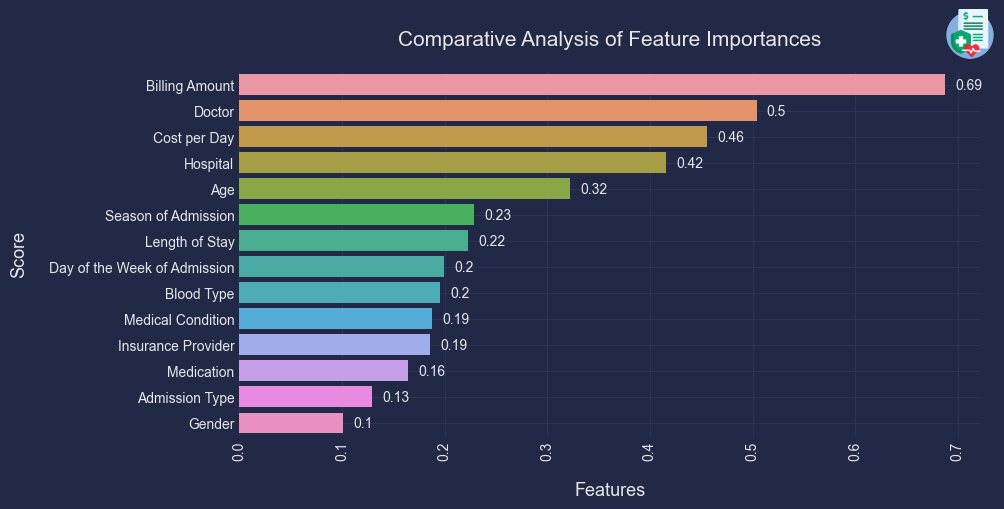

In [102]:
plt.figure(figsize=(10, 5))
ax=sns.barplot(data = feature_importances, y= "feature",x='votes', order= feature_importances.sort_values('votes', ascending=False)['feature'],orient ="h")
ax.set_title("Comparative Analysis of Feature Importances", fontsize=15,y=1.05)
ax.set_xlabel("Features", labelpad =15, fontsize=13)
ax.set_ylabel("Score", labelpad =15, fontsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
newax = ax.figure.add_axes([0.85, 0.91, 0.15, 0.1], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
sns.despine(left=True, bottom=True)
plt.tight_layout()
ax.grid(color='#2A3459')
for patch in ax.patches:
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    center_y = y + height / 2
    right_x = x + width
    ax.text(right_x + 0.01, center_y, round(width, 2),
            ha='left', va='center', fontsize=10)

plt.show()

In [30]:
meta_mask= votes >0.188
x_train_reduced= x_train.loc[:,meta_mask]
x_test_reduced= x_test.loc[:,meta_mask]
x_train_reduced.columns

Index(['Age', 'Blood Type', 'Doctor', 'Hospital', 'Billing Amount',
       'Length of Stay', 'Cost per Day', 'Season of Admission',
       'Day of the Week of Admission'],
      dtype='object')

In [32]:
#training random forest

rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_reduced, y_train)
y_pred_rfc = rfc.predict(x_test_reduced)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rfc))

rfc_report = classification_report(y_test, y_pred_rfc)
rfc_report = rfc_report.split('\n')[2:4]

rfc_table = [line.split()[1:4] for line in rfc_report]

rfc_table_df = pd.DataFrame(rfc_table, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(rfc_table_df)
print()

rfc_conf_m = confusion_matrix(y_test, y_pred_rfc)
print('  Confusion Matrix')
rfc_conf_m_df = pd.DataFrame(rfc_conf_m)
display(rfc_conf_m_df)

Random Forest Classifier Accuracy: 0.5103857566765578


,Precision,Recall,F1-Score
0,0.47,0.37,0.42
1,0.53,0.63,0.58



  Confusion Matrix


,0,1
0,118,199
1,131,226


In [33]:
#tuning random forest level 1

param_grid_rfc = {
    'n_estimators': [100,200,300,400,500],
}
rfc= RandomForestClassifier(random_state=1)
grid_rfc = GridSearchCV(rfc, param_grid_rfc,refit=True,n_jobs=-1,cv=5,scoring='accuracy')
grid_rfc.fit(x_train_reduced, y_train)
print(f"Best Estimator (CLF): {grid_rfc.best_params_} , Best Score (CLF): {grid_rfc.best_score_}")

Best Estimator (CLF): {'n_estimators': 100} , Best Score (CLF): 0.49049156122469906


In [34]:
#tuning random forest level 2

param_grid_rfc={'min_samples_split': [30,35,37,40],
    'min_samples_leaf': [22,26,28,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
rfc= RandomForestClassifier(random_state=1, max_depth=None,n_estimators=100,n_jobs=-1,verbose=0)
grid_rfc = GridSearchCV(rfc, param_grid_rfc,refit=True,n_jobs=-1,cv=5,scoring='accuracy')
grid_rfc.fit(x_train_reduced, y_train)
print(f"Best Estimator (CLF): {grid_rfc.best_params_} , Best Score (CLF): {grid_rfc.best_score_}")

Best Estimator (CLF): {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 30} , Best Score (CLF): 0.4937977564957037


In [35]:
#tuning evaluation

best= grid_rfc.best_estimator_
best.fit(x_train_reduced,y_train)
predy= best.predict(x_test_reduced)
rfc_accuracy = accuracy_score(predy,y_test)
print("Accuracy after tuning:",rfc_accuracy)

#evaluation
rfc_report = classification_report(y_test, predy)
rfc_report = rfc_report.split('\n')[2:4]

rfc_table = [line.split()[1:4] for line in rfc_report]

rfc_table_df = pd.DataFrame(rfc_table, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(rfc_table_df)
print()

rfc_conf_m = confusion_matrix(y_test, predy)
print('  Confusion Matrix')
rfc_conf_m_df = pd.DataFrame(rfc_conf_m)
display(rfc_conf_m_df)

Accuracy after tuning: 0.516320474777448


,Precision,Recall,F1-Score
0,0.46,0.16,0.23
1,0.53,0.83,0.65



  Confusion Matrix


,0,1
0,50,267
1,59,298


In [36]:
#training xgb model
xgb_c = XGBClassifier(random_state=1)
xgb_c.fit(x_train_reduced, y_train)
y_pred_xgb = xgb_c.predict(x_test_reduced)
print("XGBoost Accuracy: ",accuracy_score(y_test, y_pred_xgb))

# Generate and print the classification report
xgb_model_report = classification_report(y_test, y_pred_xgb)
xgb_model_report = xgb_model_report.split('\n')[2:4]

# Extract precision, recall, and F1-score
xgb_model_table = [line.split()[1:4] for line in xgb_model_report]

# Create a DataFrame
xgb_model_table_df = pd.DataFrame(xgb_model_table, columns=['Precision', 'Recall', 'F1-Score'])
display(xgb_model_table_df)
print()

# Generate and print the confusion matrix
print('  Confusion Matrix')
xgb_model_conf_m = confusion_matrix(y_test, y_pred_xgb)
xgb_model_conf_m_df = pd.DataFrame(xgb_model_conf_m)
display(xgb_model_conf_m_df)

XGBoost Accuracy:  0.5029673590504451


,Precision,Recall,F1-Score
0,0.45,0.27,0.34
1,0.52,0.71,0.60



  Confusion Matrix


,0,1
0,85,232
1,103,254


In [37]:
#tuning xgb

param_grid_xgb = {
    'n_estimators': [200,250, 300],
    'max_depth': [5, 8,10],
    'learning_rate': [0.08, 0.05],
    'subsample': [0.8,0.85 ,0.9, 1.0],
}

xgb_c= XGBClassifier(random_state=1)
grid_xgb = GridSearchCV(xgb_c, param_grid_xgb,refit=True,n_jobs=-1,cv=5,scoring='accuracy')
grid_xgb.fit(x_train_reduced, y_train)
print(f"Best Paramters (XGB): {grid_xgb.best_params_} , Best Score (XGB): {grid_xgb.best_score_}")

Best Paramters (XGB): {'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9} , Best Score (XGB): 0.49313714633362726


In [38]:
#tuning evaluation

best= grid_xgb.best_estimator_
best.fit(x_train_reduced,y_train)
y_pred_xgb= best.predict(x_test_reduced)
xgb_accuracy = accuracy_score(y_pred_xgb,y_test)
print("Accuracy after tuning:",xgb_accuracy)

# Generate and print the classification report
xgb_model_report = classification_report(y_test, y_pred_xgb)
xgb_model_report = xgb_model_report.split('\n')[2:4]

# Extract precision, recall, and F1-score
xgb_model_table = [line.split()[1:4] for line in xgb_model_report]

# Create a DataFrame
xgb_model_table_df = pd.DataFrame(xgb_model_table, columns=['Precision', 'Recall', 'F1-Score'])
display(xgb_model_table_df)
print()

# Generate and print the confusion matrix
print('  Confusion Matrix')
xgb_model_conf_m = confusion_matrix(y_test, y_pred_xgb)
xgb_model_conf_m_df = pd.DataFrame(xgb_model_conf_m)
display(xgb_model_conf_m_df)

Accuracy after tuning: 0.5207715133531158


,Precision,Recall,F1-Score
0,0.49,0.33,0.39
1,0.54,0.69,0.60



  Confusion Matrix


,0,1
0,104,213
1,110,247


In [39]:
#training the SVM model 
svc= SVC(random_state=1)
svc.fit(x_train_reduced,y_train)
y_pred_svc = svc.predict(x_test_reduced)

print("Support Vector Machine's Accuracy:", accuracy_score(y_test, y_pred_svc))

print()

svc_classification_report = classification_report(y_test, y_pred_svc)
svc_report_lines = svc_classification_report.split('\n')[2:4]
svc_table_data = [line.split()[1:4] for line in svc_report_lines]
svc_table_df = pd.DataFrame(svc_table_data, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(svc_table_df)

print()

svc_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
print('  Confusion Matrix')
svc_conf_matrix_df = pd.DataFrame(svc_confusion_matrix)

display(svc_conf_matrix_df)


Support Vector Machine's Accuracy: 0.5296735905044511



,Precision,Recall,F1-Score
0,0.00,0.00,0.00
1,0.53,1.00,0.69



  Confusion Matrix


,0,1
0,0,317
1,0,357


In [40]:
#tuning of the SVC level 1

svc_param_grid = {
    'C': [0.1, 1, 1.5],
    'kernel': ['linear', 'rbf', 'poly']
}

# Instantiate the grid search model
svc=SVC(random_state=100)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=svc_param_grid, refit=True, scoring='accuracy', cv=5, n_jobs=-1)

# training model
grid_search_svc.fit(x_train_reduced, y_train)

# Access the cross-validation results
svc_grid_search_results = pd.DataFrame(grid_search_svc.cv_results_)
display(svc_grid_search_results[['param_C', 'param_kernel', 'mean_test_score']])

# Get the best parameters
best_params_svc = grid_search_svc.best_params_
print("\nBest Values for Hyperparameters:", best_params_svc)
print("\nBest Score:", grid_search_svc.best_score_)


,param_C,param_kernel,mean_test_score
0,0.1,linear,0.506031
1,0.1,rbf,0.506526
2,0.1,poly,0.507353
3,1,linear,0.509836
4,1,rbf,0.502890
5,1,poly,0.506857
6,1.5,linear,0.502894
7,1.5,rbf,0.502724
8,1.5,poly,0.506692



Best Values for Hyperparameters: {'C': 1, 'kernel': 'linear'}

Best Score: 0.509836419689792


In [41]:
#tuning of the SVC level 2

svc_param_grid = {
    'gamma': [0.01, 0.04, 0.06],
    'coef0': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

# Instantiate the grid search model
svc=SVC(**best_params_svc)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=svc_param_grid, refit=True, scoring='accuracy', cv=5, n_jobs=-1)

# training model
grid_search_svc.fit(x_train_reduced, y_train)

# Access the cross-validation results
svc_grid_search_results = pd.DataFrame(grid_search_svc.cv_results_)
display(svc_grid_search_results[['param_gamma','mean_test_score']])

# Get the best parameters
best_params_svc = grid_search_svc.best_params_
print("\nBest Values for Hyperparameters:", best_params_svc)
print("\nBest Score:", grid_search_svc.best_score_)

,param_gamma,mean_test_score
0,0.01,0.509836
1,0.04,0.509836
2,0.06,0.509836
3,0.01,0.509836
4,0.04,0.509836
5,0.06,0.509836
6,0.01,0.509836
7,0.04,0.509836
8,0.06,0.509836
9,0.01,0.508349



Best Values for Hyperparameters: {'class_weight': None, 'coef0': 0.0, 'gamma': 0.01}

Best Score: 0.509836419689792


In [42]:
#tuning evaluation

best= grid_search_svc.best_estimator_
best.fit(x_train_reduced,y_train)
y_pred_svc= best.predict(x_test_reduced)
svc_accuracy = accuracy_score(y_pred_svc,y_test)
print("Accuracy after tuning:",svc_accuracy)


svc_classification_report = classification_report(y_test, y_pred_svc)
svc_report_lines = svc_classification_report.split('\n')[2:4]
svc_table_data = [line.split()[1:4] for line in svc_report_lines]
svc_table_df = pd.DataFrame(svc_table_data, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(svc_table_df)

print()

svc_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
print('  Confusion Matrix')
svc_conf_matrix_df = pd.DataFrame(svc_confusion_matrix)

display(svc_conf_matrix_df)


Accuracy after tuning: 0.5


,Precision,Recall,F1-Score
0,0.47,0.43,0.44
1,0.53,0.57,0.55



  Confusion Matrix


,0,1
0,135,182
1,155,202


In [43]:
#training AdaBoostClassifier
ada= AdaBoostClassifier(random_state=120)
ada.fit(x_train_reduced, y_train)
y_pred_ada = ada.predict(x_test_reduced)


print("Accuracy of ADA Boost Classifier: ",accuracy_score(y_test, y_pred_ada))

print()

ada_classification_report = classification_report(y_test, y_pred_ada)
ada_report_lines = ada_classification_report.split('\n')[2:4]
ada_table_data = [line.split()[1:4] for line in ada_report_lines]
ada_table_df = pd.DataFrame(ada_table_data, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(ada_table_df)

print()

ada_confusion_matrix = confusion_matrix(y_test, y_pred_ada)
print('  Confusion Matrix')
ada_conf_matrix_df = pd.DataFrame(ada_confusion_matrix)

display(ada_conf_matrix_df)

Accuracy of ADA Boost Classifier:  0.4807121661721068



,Precision,Recall,F1-Score
0,0.47,0.82,0.60
1,0.53,0.18,0.26



  Confusion Matrix


,0,1
0,261,56
1,294,63


In [44]:
#tuning AdaBoostClassifier

ada_param_grid = {
    'n_estimators': [50, 100, 200],           
    'learning_rate': [0.01, 0.1, 0.5, 1.0],   
    'algorithm': ['SAMME', 'SAMME.R']         
}

# Instantiate the grid search model
ada= AdaBoostClassifier(random_state=120)
ada_grid_search = GridSearchCV(estimator=ada, param_grid=ada_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# training model
ada_grid_search.fit(x_train_reduced, y_train)

# Access the cross-validation results
ada_grid_search_results = pd.DataFrame(ada_grid_search.cv_results_)
display(ada_grid_search_results[['param_n_estimators', 'param_learning_rate', 'param_algorithm','mean_test_score']])

# Get the best parameters
best_params_ada = ada_grid_search.best_params_
print("\nBest Values for Hyperparameters:", best_params_ada)
print("\nBest Score:", ada_grid_search.best_score_)

,param_n_estimators,param_learning_rate,param_algorithm,mean_test_score
0,50,0.01,SAMME,0.512151
1,100,0.01,SAMME,0.512151
2,200,0.01,SAMME,0.512647
3,50,0.1,SAMME,0.511820
4,100,0.1,SAMME,0.512316
5,200,0.1,SAMME,0.512316
6,50,0.5,SAMME,0.507850
7,100,0.5,SAMME,0.506031
8,200,0.5,SAMME,0.504379
9,50,1.0,SAMME,0.499255



Best Values for Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}

Best Score: 0.5126470206235603


In [45]:
#tuning evaluation

best= ada_grid_search.best_estimator_
best.fit(x_train_reduced,y_train)
y_pred_ada= best.predict(x_test_reduced)
ada_accuracy = accuracy_score(y_pred_ada,y_test)
print("Accuracy after tuning:",ada_accuracy)


ada_classification_report = classification_report(y_test, y_pred_ada)
ada_report_lines = ada_classification_report.split('\n')[2:4]
ada_table_data = [line.split()[1:4] for line in ada_report_lines]
ada_table_df = pd.DataFrame(ada_table_data, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(ada_table_df)

print()

ada_confusion_matrix = confusion_matrix(y_test, y_pred_ada)
print('  Confusion Matrix')
ada_conf_matrix_df = pd.DataFrame(ada_confusion_matrix)

display(ada_conf_matrix_df)

Accuracy after tuning: 0.5296735905044511


,Precision,Recall,F1-Score
0,0.00,0.00,0.00
1,0.53,1.00,0.69



  Confusion Matrix


,0,1
0,0,317
1,0,357


In [46]:
#training logistic regression

#Create a model and train it
model = LogisticRegression(random_state=42)
model.fit(x_train_reduced, y_train)

#Evaluate the model
y_pred = model.predict(x_test_reduced)

LRmodel_score = accuracy_score(y_pred, y_test)
print("Logistic Regression Accuracy:", LRmodel_score)
print()

LRmodel_report = classification_report(y_test, y_pred)
LRmodel_report = LRmodel_report.split('\n')[2:4]

LRmodel_table = [line.split()[1:4] for line in LRmodel_report]

LRmodel_table_df = pd.DataFrame(LRmodel_table, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(LRmodel_table_df)
print()

LRmodel_conf_m = confusion_matrix(y_test, y_pred)
print('  Confusion Matrix')
LRmodel_conf_m_df = pd.DataFrame(LRmodel_conf_m)
display(LRmodel_conf_m_df)

Logistic Regression Accuracy: 0.516320474777448



,Precision,Recall,F1-Score
0,0.42,0.07,0.12
1,0.53,0.91,0.67



  Confusion Matrix


,0,1
0,23,294
1,32,325


In [103]:
#tuning the logistic regresion model

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
    'fit_intercept': [True, False],
    'random_state': [None, 1,2,3,4,5]
}

# Create a base model
base_LRmodel = LogisticRegression()

# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator=base_LRmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# training model
grid_search_lr.fit(x_train_reduced, y_train)

# Access the cross-validation results
lr_grid_search_results = pd.DataFrame(grid_search_lr.cv_results_)
display(lr_grid_search_results[['param_C', 'param_penalty', 'param_solver','param_max_iter', 'param_fit_intercept', 'param_random_state', 'mean_test_score']])

# Get the best parameters
best_LRparams = grid_search_lr.best_params_
print(f"Best parameters: {best_LRparams}, Best Score: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


,param_C,param_penalty,param_solver,param_max_iter,param_fit_intercept,param_random_state,mean_test_score
0,0.001,l1,newton-cg,100,True,None,NaN
1,0.001,l1,lbfgs,100,True,None,NaN
2,0.001,l1,liblinear,100,True,None,0.510498
3,0.001,l1,sag,100,True,None,NaN
4,0.001,l1,saga,100,True,None,0.510498
...,...,...,...,...,...,...,...
5995,10,none,newton-cg,1000,False,5,0.501073
5996,10,none,lbfgs,1000,False,5,0.509009
5997,10,none,liblinear,1000,False,5,NaN
5998,10,none,sag,1000,False,5,0.505203


Best parameters: {'C': 0.01, 'fit_intercept': False, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 1, 'solver': 'saga'}, Best Score: 0.5144619212654404


In [48]:
#tuning evaluation

best= grid_search_lr.best_estimator_
best.fit(x_train_reduced,y_train)
y_pred_lr= best.predict(x_test_reduced)
lr_accuracy = accuracy_score(y_pred_lr,y_test)
print("Accuracy after tuning:",lr_accuracy)


best_model_report = classification_report(y_test, y_pred_lr)
best_model_report = best_model_report.split('\n')[2:4]

best_model_table = [line.split()[1:4] for line in best_model_report]

best_model_table_df = pd.DataFrame(best_model_table, columns=[ 'Precision', 'Recall', 'F1-Score'])
display(best_model_table_df)
print()

best_model_conf_m = confusion_matrix(y_test, y_pred_lr)
print('  Confusion Matrix')
best_model_conf_m_df = pd.DataFrame(best_model_conf_m)
display(best_model_conf_m_df)

Accuracy after tuning: 0.526706231454006


,Precision,Recall,F1-Score
0,0.38,0.01,0.02
1,0.53,0.99,0.69



  Confusion Matrix


,0,1
0,3,314
1,5,352


In [105]:
#Train the Decision Tree model

# Create a Decision Tree model
dtc = DecisionTreeClassifier(random_state=120)

# Train the model
dtc.fit(x_train_reduced,y_train)

# Make predictions on test set
y_pred_dtc = dtc.predict(x_test_reduced)

# Calculate and print the accuracy
dtc_model_score = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy:", dtc_model_score)
print()

# Generate and print the classification report
dtc_model_report = classification_report(y_test, y_pred_dtc)
dtc_model_report = dtc_model_report.split('\n')[2:4]

# Extract precisionprecision, recall, and F1-score
dtc_model_table = [line.split()[1:4] for line in dtc_model_report]

# Create a DataFrame
dtc_model_table_df = pd.DataFrame(dtc_model_table, columns=['Precision', 'Recall', 'F1-Score'])
display(dtc_model_table_df)
print()

# Generate and print the confusion matrix
print('  Confusion Matrix')
dtc_model_conf_m = confusion_matrix(y_test, y_pred_dtc)
dtc_model_conf_m_df = pd.DataFrame(dtc_model_conf_m)
display(dtc_model_conf_m_df)

Decision Tree Classifier Accuracy: 0.4792284866468843



,Precision,Recall,F1-Score
0,0.45,0.49,0.47
1,0.51,0.47,0.49



  Confusion Matrix


,0,1
0,155,162
1,189,168


In [106]:
#Tuning the Decision Tree model

# Define the parameter grid
param_grid = {
    'max_depth': [8,12],
    'min_samples_split': [37,39,40,45],
    'min_samples_leaf': [ 28,30,32,34,36]
    
}

# Create a base model
base_dtc_model = DecisionTreeClassifier(random_state=41,criterion='entropy',splitter='best',max_features= None)

# Instantiate the grid search model
dtc_grid_search = GridSearchCV(estimator=base_dtc_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Training model
dtc_grid_search.fit(x_train_reduced, y_train)
best = dtc_grid_search.best_estimator_

# Access the cross-validation results
dtc_grid_search_results = pd.DataFrame(dtc_grid_search.cv_results_)
display(dtc_grid_search_results[[ 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']])

# Get the best parameters
best_dtc_params = dtc_grid_search.best_params_

print(f"Best parameters: {best_dtc_params}, Best Score: {dtc_grid_search.best_score_}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits


,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,8,37,28,0.500413
1,8,39,28,0.500413
2,8,40,28,0.500413
3,8,45,28,0.500413
4,8,37,30,0.498099
5,8,39,30,0.498099
6,8,40,30,0.498099
7,8,45,30,0.498099
8,8,37,32,0.501569
9,8,39,32,0.501569


Best parameters: {'max_depth': 8, 'min_samples_leaf': 32, 'min_samples_split': 37}, Best Score: 0.5015690858506108


In [107]:
#tuning evaluation

best= dtc_grid_search.best_estimator_
best.fit(x_train_reduced,y_train)
y_pred_dt= best.predict(x_test_reduced)
dt_accuracy = accuracy_score(y_pred_dt,y_test)
print("Accuracy after tuning:",dt_accuracy)

# Generate and print the classification report
dtc_model_report = classification_report(y_test, y_pred_dt)
dtc_model_report = dtc_model_report.split('\n')[2:4]

# Extract precisionprecision, recall, and F1-score
dtc_model_table = [line.split()[1:4] for line in dtc_model_report]

# Create a DataFrame
dtc_model_table_df = pd.DataFrame(dtc_model_table, columns=['Precision', 'Recall', 'F1-Score'])
display(dtc_model_table_df)
print()

# Generate and print the confusion matrix
print('  Confusion Matrix')
dtc_model_conf_m = confusion_matrix(y_test, y_pred_dt)
dtc_model_conf_m_df = pd.DataFrame(dtc_model_conf_m)
display(dtc_model_conf_m_df)

Accuracy after tuning: 0.5400593471810089


,Precision,Recall,F1-Score
0,0.51,0.48,0.49
1,0.56,0.60,0.58



  Confusion Matrix


,0,1
0,151,166
1,144,213


In [75]:
#conclusion

# Assuming you have the model names, hyperparameters, and accuracies stored in lists
models = ['Logistic Regression', 'Decision Tree', 'SVC', 'Random Forest','XGB','AdaBoostClassifier']
best_hyperparameters = [best_LRparams, best_dtc_params, best_params_svc, grid_rfc.best_params_, grid_xgb.best_params_,best_params_ada] 
best_accuracies = [lr_accuracy, dt_accuracy, svc_accuracy, rfc_accuracy, xgb_accuracy, ada_accuracy] 

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'Best Hyperparameters': best_hyperparameters, 'Best Accuracy': best_accuracies})

# Print the DataFrame
display(df)

best_model_index = df['Best Accuracy'].idxmax()

# Use this index to get the entire row
best_model = df.loc[best_model_index]

print("This the best Model")
print(best_model)

,Model,Best Hyperparameters,Best Accuracy
0,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'max_iter'...",0.526706
1,Decision Tree,"{'max_depth': 8, 'min_samples_leaf': 32, 'min_...",0.540059
2,SVC,"{'class_weight': None, 'coef0': 0.0, 'gamma': ...",0.500000
3,Random Forest,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.516320
4,XGB,"{'learning_rate': 0.08, 'max_depth': 5, 'n_est...",0.520772
5,AdaBoostClassifier,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.529674


This the best Model
Model                                                       Decision Tree
Best Hyperparameters    {'max_depth': 8, 'min_samples_leaf': 32, 'min_...
Best Accuracy                                                    0.540059
Name: 1, dtype: object


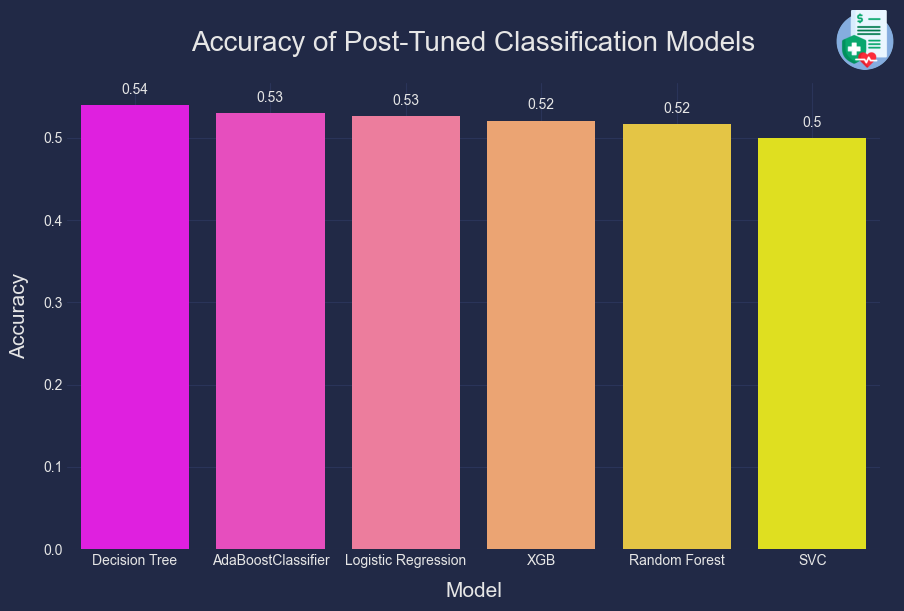

In [98]:
plt.figure(figsize=(9, 6))
colormap_sect = np.linspace(0, 5, 25)
colors = [cm.spring(x) for x in colormap_sect]
sorted_df = df.sort_values('Best Accuracy', ascending=False)

ax = sns.barplot(data=sorted_df, y='Best Accuracy', x='Model',palette=colors)
ax.set_xlabel('Model', fontsize=15, labelpad=10)
ax.set_ylabel('Accuracy', fontsize=15, labelpad=10)
ax.set_title('Accuracy of Post-Tuned Classification Models', fontsize=20, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
ax.grid(color='#2A3459')

newax = ax.figure.add_axes([0.85, 0.91, 0.15, 0.1], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
# Annotate the bars with their values
for i, patch in enumerate(ax.patches):
    
    x = patch.get_x()
    y = patch.get_y()
    
    
    width = patch.get_width()
    height = patch.get_height()
    
    
    center_x = x + width / 2
    top_y = y + height
    
    
    ax.text(center_x, top_y + 0.01, round(height, 2),
            ha='center', va='bottom', fontsize=10)
plt.show()